In [3]:
from os import path
import sys
import os
import numpy
current_dir = os.path.abspath('')
sys.path.append(path.dirname(current_dir)+"/src")
from basicrouter import BasicRouter
import maputil
import matplotlib.pyplot as plt

if path.isfile(current_dir + "/testfiles/api.txt"):
    # API Key file exists
    pass
else:
    # Need to make API Key file
    f = open(current_dir + "/testfiles/api.txt", "w")
    f.write(input("API Key????\n > "))
    f.close()

In [4]:
testnum=2
myRouter = BasicRouter(
    open(current_dir + "/testfiles/test{}.txt".format(testnum)).read().splitlines(),
    open(current_dir+ "/testfiles/api.txt").read()
)
result = myRouter.routeOneVehicle()
print("\n".format(testnum).join(result[0]))
print(maputil.genmapslink(result[0]))
print(maputil.genmapslink(myRouter._addresses))

for i in range(1,4):
    print("result[{}]:{}".format(i, result[i]))

3400 Westgate Dr, Durham, NC 27707, USA
8 Wedgewood Rd, Chapel Hill, NC 27514, USA
207 Ashley Forest Rd, Chapel Hill, NC 27514, USA
213 W Franklin St, Chapel Hill, NC 27516, USA
https://www.google.com/maps/dir/3400+Westgate+Dr%2C+Durham%2C+NC+27707%2C+USA/8+Wedgewood+Rd%2C+Chapel+Hill%2C+NC+27514%2C+USA/207+Ashley+Forest+Rd%2C+Chapel+Hill%2C+NC+27514%2C+USA/213+W+Franklin+St%2C+Chapel+Hill%2C+NC+27516%2C+USA/
https://www.google.com/maps/dir/li+ming%27s+global+market/207+Ashley+Forest+Rd%2C+Chapel+Hill%2C+NC+27514/8+Wedgewood+Rd+Chapel+Hill%2C+NC+27514/213+W+Franklin+St%2C+Chapel+Hill%2C+NC+27516/
result[1]:[(35.9661961, -78.963248), (35.9733299, -79.0508445), (35.9445544, -79.0560079), (35.9114138, -79.05900489999999)]
result[2]:["li ming's global market", '8 Wedgewood Rd Chapel Hill, NC 27514', '207 Ashley Forest Rd, Chapel Hill, NC 27514', '213 W Franklin St, Chapel Hill, NC 27516']
result[3]:[0, 2, 1, 3]


In [5]:
#ordered coordinates need to be a list of numbers.
ordered_coordinates = result[1]

#Need someone to help to convert "result[1]" into a list of numbers

x_coordinates = [row[0] for row in ordered_coordinates]
y_coordinates = [row[1] for row in ordered_coordinates]

#specifying the boundaries of the plot
x_min = min(x_coordinates) - numpy.std(x_coordinates)
x_max = max(x_coordinates) + numpy.std(x_coordinates)
y_min = min(y_coordinates) - numpy.std(y_coordinates)
y_max = max(y_coordinates) + numpy.std(y_coordinates)

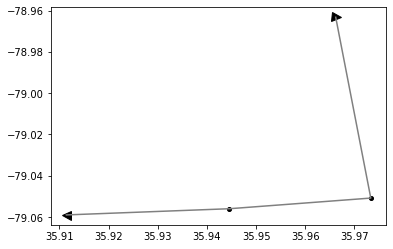

In [6]:
plt.plot(x_coordinates[1:len(result[1])-1], y_coordinates[1:len(result[1])-1], 'ko', markersize=4)
plt.plot(x_coordinates[0], y_coordinates[0], 'k>', markersize=9)
plt.plot(x_coordinates[-1], y_coordinates[-1], 'k<', markersize=9)


plt.plot(x_coordinates, y_coordinates, color='gray', linestyle='-')

plt.show()